・扱いたい主題＝絵本(今やってる研究)
　候補：
　1. 子どもが好きな絵本の関係の可視化
　2. 親が、子どもがその絵本を好きだと思う理由の可視化
　3. 絵本ナビのレビューに出現する語の可視化
　4. 図書館の棚の探索回数と経路の可視化

・問いの設定
　候補：
　1. 子どもが好きな絵本同士のネットワークはどうなっているのか？
　　　(ある絵本とある絵本がつながっている/ハブになる絵本がある　というような関係がある？)
　2. どんな理由が多いのか？理由同士はどのような関係なのか？
　3. どのような言葉で大人は絵本を評価しているのか？言葉同士はどのような関係なのか？
　4. 図書館の棚で探索されやすいのはどの位置と高さか？
　　　館内を回る経路に特徴やパターンはあるのか？

・使う手法
　候補：
　1. 書名の共起ネットワーク？
　2. 理由のワードクラウド？理由同士の共起ネットワーク？
　3. ワードクラウド？言葉同士の共起ネットワーク？
　4. 回数を館内図上にマッピング？トラッキング的な？　インタラクティブにしたい

・データ取得方法
　候補：
　1. 修論の時に自分で取得したデータを使用
　2. 同上
　3. 絵本ナビなどのレビューサイトから、期間を決めて取得
　4. 今持っている観察のデータを使用

・考えられる問題点
　1. 書名単位で扱うようにできる？　1回しか言及されない絵本も多かったので、なにとも繋がっていない図ができそう
　2. 一言の回答がほとんどだったので、分析に耐えるデータ数より少ないかもしれない
　 　上位3位まで回答してもらったのだが、順位を共起関係に反映できるのか
　3. chromeからデータを取得するときに動かなくなったので、そもそもデータをとってこられるか分からない
　4. 整然データへの変換方法がよくわからない　
　　 経路のトラッキングってできるのか？
　　 データ数が少ない
　

In [15]:
with open('reason.txt', 'r') as file:
    content = file.read()

# 内容を確認
print(content)

id	1	2	3
1	なし	なし	なし
2	寝る前に毎日聞きたい	ユーモア	たくさんのセット
3	なし	なし	なし
4	歌	しかけ絵本	なし
5	ユーモアがある	ユーモアがある	なし
6	ゆずるくんとのやりとり	なし	なし
7	ストーリー展開	見つける楽しみ	色々なトピックがある
8	なし	なし	なし
9	めくるたびにいろいろな動物のいただきますがみられる	おおきなとりが出てきておどろく場面が好きなよう	花火の絵がカラフルでかわいい
10	おもしろさ	なし	なし
11	キャラクター	なし	なし
12	おもしろいストーリー	かわいい絵	ストーリーの展開
13	ばけたくんのへんしん	野菜がかわいい	野菜がかわいい
14	じゃぶじゃぶが繰り返し使われており、おもしろい様子	なし	なし
15	なし	なし	なし
16	おしたらダメなのに押したい気持ち	おばけが好き	なし
17	パンがたくさん出てくるところ	カステラをみんなで食べるところ	キツネとオオカミが仲良く遊ぶところ
18	なし	なし	なし
19	歯ブラシが電車に見立てられているところ（電車が好きなので）	登場人物の名前（お友達に同じ名前の子がいるので）	なし
20	なし	なし	なし
21	線路が好き	バスが好き	動物が出てくる
22	けろちゃんがおならするところ	ちょっと汚いところ	まずい顔のドアップ
23	幼稚園で借りてきて目新しいストーリーだから	ストーリーの内容がおもしろいから	ストーリーが好きだから
24	かわいいお弁当がおいしそうだから	たべるのが好きだから	親しみやすいキャラクター
25	お医者さんのストーリー	リズム	作る工程
26	なし	なし	なし
27	わからない	わからない	わからない
28	サンタからプレゼントがもらえる	なし	なし
29	ドアをめくる動作	絵が好きそう	何の新幹線が好きか聞いてくる
30	絵がきれいだから	自分で読めるから	絵がかわいいから
31	美味しそう	くるま	なし
32	ひらがなが覚えれる	なし	なし
33	登場人物達のやりとりがおもしろい	言葉の繰り返し	ドテッやプッなどの擬音語がたのしい
34	なし	なし	なし
35	ノンタンのはなす口調がおもしろい	絵が可愛くはなす口調がおもしろい	絵がかわいい
36	なし	なし	なし
37	自分の生活にも起こりそうだから。	言い回

In [16]:
!pip install spacy ginza ja-ginza
!pip install scikit-learn pandas

In [17]:
# ライブラリのインポート
import spacy

# 日本語モデルのロード
nlp = spacy.load("ja_ginza")

# テキストファイルを読み込む
file_path = 'reason.txt'  # 解析したいテキストファイルのパス

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()  # ファイルの内容を読み取ってtextに格納

# 解析
doc = nlp(text)

# 結果の確認
for token in doc:
    print(f"text: {token.text}, pos: {token.pos_}, lemma: {token.lemma_}")


text: id, pos: VERB, lemma: ID
text: 	, pos: AUX, lemma: 	
text: 1, pos: NUM, lemma: 1
text: 	, pos: NOUN, lemma: 	
text: 2, pos: NUM, lemma: 2
text: 	, pos: NOUN, lemma: 	
text: 3, pos: NUM, lemma: 3
text: 
, pos: NUM, lemma: 

text: 1, pos: NUM, lemma: 1
text: 	, pos: NOUN, lemma: 	
text: なし, pos: NOUN, lemma: なし
text: 	, pos: NOUN, lemma: 	
text: なし, pos: NOUN, lemma: なし
text: 	, pos: NOUN, lemma: 	
text: なし, pos: NOUN, lemma: なし
text: 
, pos: NUM, lemma: 

text: 2, pos: NUM, lemma: 2
text: 	, pos: NOUN, lemma: 	
text: 寝る, pos: VERB, lemma: 寝る
text: 前, pos: NOUN, lemma: 前
text: に, pos: ADP, lemma: に
text: 毎日, pos: ADV, lemma: 毎日
text: 聞き, pos: VERB, lemma: 聞く
text: たい, pos: AUX, lemma: たい
text: 	, pos: NOUN, lemma: 	
text: ユーモア, pos: NOUN, lemma: ユーモア
text: 	, pos: VERB, lemma: 	
text: たくさん, pos: ADJ, lemma: たくさん
text: の, pos: ADP, lemma: の
text: セット, pos: NOUN, lemma: セット
text: 
, pos: NUM, lemma: 

text: 3, pos: NUM, lemma: 3
text: 	, pos: NOUN, lemma: 	
text: なし, pos: NOUN, lemma

In [18]:
import pandas as pd

# 解析結果をpandasのDataFrameに入れる

df = pd.DataFrame({
    "text": token.text,
    "lemma_": token.lemma_,
    "pos_": token.pos_,
} for token in doc)

df

,text,lemma_,pos_
0,id,ID,VERB
1,\t,\t,AUX
2,1,1,NUM
3,\t,\t,NOUN
4,2,2,NUM
...,...,...,...
6456,\t,\t,NOUN
6457,なし,なし,NOUN
6458,\t,\t,NOUN
6459,なし,なし,NOUN


In [19]:
# 分析対象とする品詞と不要語（ストップワード）を指定する
include_pos = ("NOUN", "VERB", "ADJ", "PROPN")
stopwords = ("ある", "いる", "お", "ところ", "もの", "こと", "くる", "なる", "する", "出る", "気", "さん", "でる", "入る")

# 単語の頻度を数える
counter = Counter(token.lemma_ for token in doc
                  if token.pos_ in include_pos and token.lemma_ not in stopwords)

# 出力する
for word, count in counter.most_common(20):
    print(f"{count:>5} {word}")

  881 	
  333 なし
   84 好き
   80 ストーリー
   78 絵
   63 おもしろい
   48 かわいい
   26 キャラクター
   25 読む
   21 内容
   21 たのしい
   16 わかる
   15 動物
   15 登場
   14 自分
   14 恐竜
   13 歌
   13 様子
   13 リズム
   13 食べ物


In [20]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
def extract_words(sent, pos_tags, stopwords):
    """
    分析対象の品詞であり、不要語ではない単語を抽出する
    """
    words = [token.lemma_ for token in sent if token.pos_ in pos_tags and token.lemma_ not in stopwords]
    return words

In [22]:
def count_cooccurrence(sents, token_length="{2,}"):
    """
    同じ文中に共起する単語を行列形式で列挙する
    """
    token_pattern = f"\\b\\w{token_length}\\b"
    count_model = CountVectorizer(token_pattern=token_pattern)

    X = count_model.fit_transform(sents)
    words = count_model.get_feature_names_out()
    word_counts = np.asarray(X.sum(axis=0)).reshape(-1)

    X[X > 0] = 1 # 同じ共起が2以上出現しても1とする
    Xc = (X.T * X) # 共起行列を求めるための掛け算をする、csr形式の疎行列

    return words, word_counts, Xc, X

In [23]:
def find_sentence_by_cooccurrence(X, idxs):
    """
    指定された共起を含む文を見つける
    """
    occur_flags = (X[:, idxs[0]] > 0)
    for idx in idxs[1:]:
        occur_flags = occur_flags.multiply(X[:, idx] > 0)

    return occur_flags.nonzero()[0]

In [59]:
# 文章を解析し、共起を求める
include_pos = ("NOUN", "VERB", "ADJ", "PROPN")
stopwords = ("ある", "いる", "お", "ところ", "もの", "こと", "くる", "なる", "する", "出る", "気", "さん", "でる", "入る", "ちゃん", "たち", "おる", "いう", "よう", "いく")

sents = []
# テキストファイルを読み込む
file_path = 'reason.txt'  # 解析したいテキストファイルのパス
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

In [61]:
# 共起ランキングを出力する
# 共起行列Xcは疎行列なので、非ゼロ要素のみをカウンタに格納する
counter = Counter()
for i, j in zip(*Xc.nonzero()):
    if i >= j:
        continue
    counter[(i, j)] += Xc[i, j]

# 共起の出現頻度top 20を出力する
for (i, j), c in counter.most_common(20):
    print(f"{c:>3d} ({words[i]}, {words[j]})")

 18 (おもしろい, ストーリー)
 12 (おもしろい, 好き)
 12 (ストーリー, 好き)
 10 (ストーリー, 内容)
  9 (おもしろい, かわいい)
  9 (なし, ストーリー)
  8 (おもしろい, たのしい)
  8 (おもしろい, なし)
  8 (かわいい, 好き)
  7 (かわいい, ストーリー)
  7 (キャラクター, ストーリー)
  7 (人物, 登場)
  6 (おもしろい, 展開)
  6 (かわいい, なし)
  6 (ストーリー, 展開)
  5 (いろいろ, 動物)
  5 (おもしろい, 内容)
  5 (たのしい, 好き)
  5 (好き, 電車)
  4 (おもしろい, フレーズ)


In [62]:
!pip install networkx pyvis japanize_matplotlib

In [63]:
import networkx as nx
from pyvis.network import Network
import japanize_matplotlib

In [64]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [65]:
def word_weights(words, word_counts):
    """
    単語の最多頻度が1となるような相対値として単語の重みを求める
    """
    count_max = word_counts.max()
    weights = [(word, {"weight": count / count_max})
               for word, count in zip(words, word_counts)]
    return weights

In [66]:
def cooccurrence_weights(words, Xc, weight_cutoff):
    """
    共起の最多頻度が1となるような相対値として共起の重みを求める
    共起の重みがweight_cutoffより低い共起は除外する
    """
    Xc_max = Xc.max()
    cutoff = weight_cutoff * Xc_max
    weights = [(words[i], words[j], Xc[i, j] / Xc_max)
               for i, j in zip(*Xc.nonzero()) if i < j and Xc[i, j] > cutoff]
    return weights

In [67]:
def create_network(words, word_counts, Xc, weight_cutoff):
    """
    語、単語頻度、共起行列から共起ネットワークをNetworkX形式で得る
    """
    G = nx.Graph()

    weights_w = word_weights(words, word_counts)
    G.add_nodes_from(weights_w)

    weights_c = cooccurrence_weights(words, Xc, weight_cutoff)
    G.add_weighted_edges_from(weights_c)

    G.remove_nodes_from(list(nx.isolates(G)))
    return G

In [68]:
def pyplot_network(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyplotで描画する
    """
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=0.1)

    weights_n = np.array(list(nx.get_node_attributes(G, "weight").values()))
    nx.draw_networkx_nodes(G, pos, node_size=300 * weights_n)
    weights_e = np.array(list(nx.get_edge_attributes(G, "weight").values()))
    nx.draw_networkx_edges(G, pos, width=20 * weights_e)

    nx.draw_networkx_labels(G, pos, font_family="IPAexGothic")

    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [69]:
def nx2pyvis_G(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyvisで描画する
    """
    pyvis_G = Network(width="800px", height="800px", notebook=True)
    for node, attrs in G.nodes(data=True):
        pyvis_G.add_node(node, title=node, size=30 * attrs["weight"])
    for node1, node2, attrs in G.edges(data=True):
        pyvis_G.add_edge(node1, node2, width=20 * attrs["weight"])

    return pyvis_G

In [70]:
# ネットワークを作る
G = create_network(words, word_counts, Xc, 0.01)

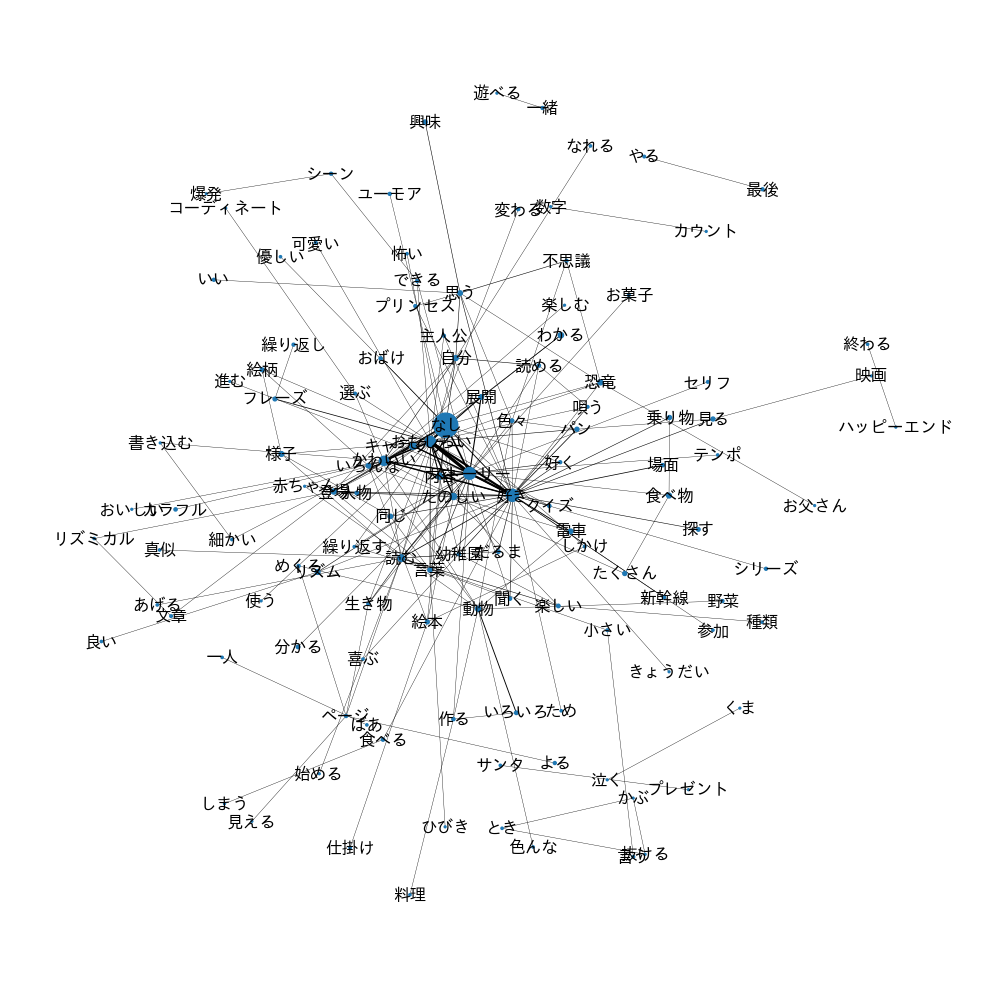

In [71]:
# 静的ビジュアライゼーション
pyplot_network(G)